In [10]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("ggplot")

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense

# Loading in the Data
data = pd.read_csv("/content/covid_19_train_v2.csv")
print(data)

            Country/Region  1/22/20  1/23/20  ...  3/20/20  3/21/20  3/22/20
0                  Germany        0        0  ...    19848    22213    24873
1                  Finland        0        0  ...      450      523      626
2                    Italy        0        0  ...    47021    53578    59138
3                   Sweden        0        0  ...     1639     1763     1934
4                    Spain        0        0  ...    20410    25374    28768
5                  Belgium        0        0  ...     2257     2815     3401
6                  Croatia        0        0  ...      128      206      254
7              Switzerland        0        0  ...     5294     6575     7245
8                  Austria        0        0  ...     2388     2814     3244
9                  Georgia        0        0  ...       43       49       54
10                  Greece        0        0  ...      495      530      624
11                  Norway        0        0  ...     1914     2118     2383

In [0]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def split_sequence(data, n_steps_in, n_steps_out):
    """
    Splits data so n_steps_in day are used to predict n_steps_out next days
    """
    x_train, y_train = [], []
    
    for row in data.to_numpy():
        for element in range(-61, -(n_steps_in + n_steps_out)):
            if np.any(row[element + n_steps_in:element + n_steps_in + n_steps_out]):
                x_train.append([row[element:element + n_steps_in]])
                y_train.append([row[element + n_steps_in:element + n_steps_in + n_steps_out]]) 
   
    return np.array(x_train), np.array(y_train)


def layer_maker(n_layers, n_nodes, activation):
    """
    Creates a specified number of hidden layers for an RNN
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))


In [0]:
#----------------------------- Data preperation---------------------------------

# How many period vectors in
n_per_in  = 1

# How many periods ahead to predict
n_per_out = 1

# How many periods looking back to train
n_periods = 4

# Splitting the data into appropriate sequences
x_train, y_train = split_sequence(data, n_periods, n_per_out)

# Reshaping the y_train variable from 3D to 2D
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])


#---------------------------- RNN initalization --------------------------------

# # Instatiating the model
# model = Sequential()

# # Activation
# activ = "relu"

# # Input layer
# model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_periods)))

# # Hidden layers
# layer_maker(n_layers=6, n_nodes=12, activation=activ)

# # Final Hidden layer
# model.add(LSTM(10, activation=activ))

# # Output layer
# model.add(Dense(n_per_out))

# # Model summary
# model.summary()

# # Compiling the data with selected specifications
# model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['accuracy'])

# res = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

# visualize_training_results(res)

#--------------------------- Loading trained model -----------------------------

model = load_model("model.h5")

Predicted Number of Cases:
 [[1125.17431640625], [1421.8367919921875], [1681.94482421875], [2044.6903076171875], [2480.296875], [2966.11962890625], [3588.411376953125]]

Actual Number of Cases:
 [[1135], [1413], [1705], [2051], [2460], [2994], [3631]]


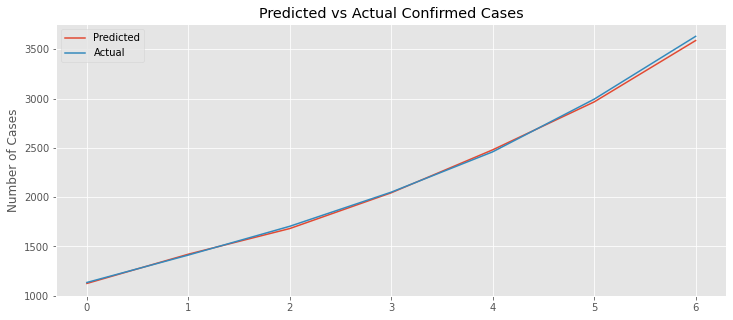

In [14]:
#----------------------------- Validation --------------------------------------

plt.figure(figsize=(12,5))

# Getting predictions by predicting from the 7 last available x_train variable
predictions = []

for i in range(7):
    predictions.append(model.predict(x_train[-7+i].reshape(1,1,4))) 

# Transforming values back to their normal format
predictions = np.array(predictions).reshape(-1,1).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = y_train[-7:].reshape(-1,1)

# Printing and plotting those predictions
print("Predicted Number of Cases:\n", predictions)
plt.plot(predictions, label='Predicted')

# Printing and plotting the actual values
print("\nActual Number of Cases:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title("Predicted vs Actual Confirmed Cases")
plt.ylabel("Number of Cases")
plt.legend()
plt.savefig("Koronawirus_validation.png")
plt.show()

              0
2020-03-16  177
2020-03-17  238
2020-03-18  251
2020-03-19  355
2020-03-20  425
2020-03-21  536
2020-03-22  634
                      0
2020-03-23   770.173645
2020-03-24   934.040527
2020-03-25  1121.861694
2020-03-26  1355.681274
2020-03-27  1633.808716
2020-03-28  1966.820068
2020-03-29  2369.612305


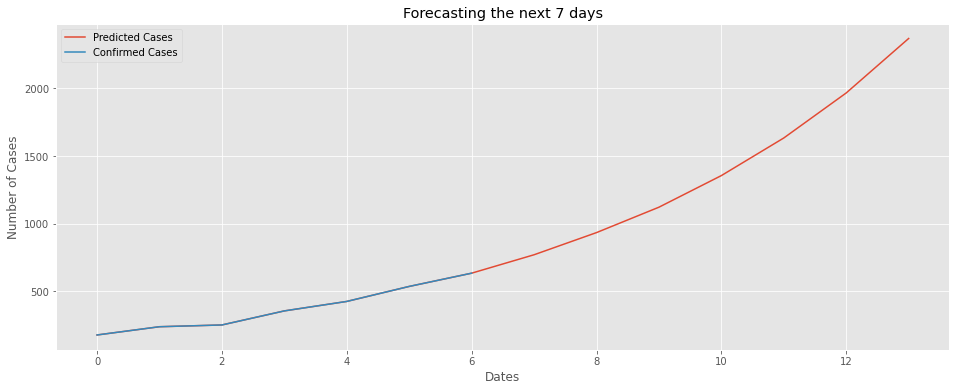

In [9]:

#------------------------------- Prediction ------------------------------------

# Test Data Preprocessing
act = pd.read_csv("/content/covid_19_poland_v2.csv")
act = np.array(act.to_numpy())
pred_data = act[:,-7:][0]

# Predicting off of y because it contains the most recent date

# Number of days predicted
pers = 7

forecast = []
for i in range(pers):
    forecast.append(model.predict(np.array(pred_data)[-4:].reshape(1,1,4)).tolist()[0])
    pred_data = np.append(pred_data, forecast[-1])

# Transforming the actual data to format usefull for plotting
previous = act[:,-pers:].reshape(-1,1).tolist()
# previous = [[x] for x in [1, 3, 3, 8, 9, 12, 17]]

# Creating a DF of the previous and printing it
prev = pd.DataFrame(previous, index=pd.date_range(end="2020-03-22", periods=len(previous), freq="D"))
print(prev)

# Printing the predicted prices
fore = pd.DataFrame(forecast, index=pd.date_range(start="2020-03-23", periods=len(forecast), freq="D"))
print(fore)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(previous+forecast, label="Predicted Cases")
plt.plot(previous, label="Confirmed Cases")
plt.ylabel("Number of Cases")
plt.xlabel("Dates")
plt.title("Forecasting the next {} days".format(pers))
plt.legend()
plt.savefig("Koronawirus_predictions.png")
plt.show()

In [0]:
model.save('model.h5')